HOJA DE TRABAJO 4

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np
import random
import pyclustertend 
import plotly.express as px
import seaborn as sb
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

In [26]:
datos = pd.read_csv("train.csv", encoding='ISO-8859-1')
datos_cluster = datos[["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"]].copy()

In [27]:
y = datos_cluster.pop("SalePrice") #La variable respuesta
X = datos_cluster #El resto de los datos

In [28]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

REGRESIÓN LINEAL

In [29]:
# %%
p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['OverallQual'].values.reshape(-1,1)
p_width_t = X_test['OverallQual'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(p_width,p_length)
p_length_pred = lm.predict(p_width_t)


In [30]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]


label = r'$p_length = %0.4f*p_width %+0.4f$'%(m,c)
print(label)

$p_length = 45287.5849*p_width -94998.9582$


Text(0.5, 1.0, 'Test Set Petal length vs Petal width')

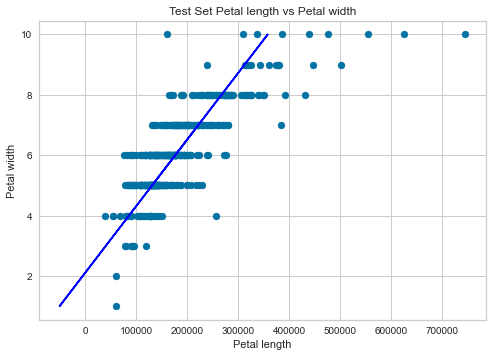

In [31]:
# %%
fig = plt.figure()
plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Test Set Petal length vs Petal width")

In [32]:
# %%
print("Mean Squared Error: %.2f"%mean_squared_error(p_length_t,p_length_pred))
print("R squared: %.2f"%r2_score(p_length_t,p_length_pred))

Mean Squared Error: 2595011411.15
R squared: 0.63


Text(0, 0.5, 'Residuales')

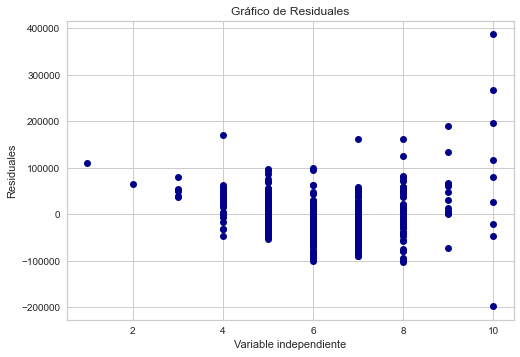

In [33]:
# %%
residuales = p_length_t - p_length_pred
len(residuales)
# %%
plt.plot(p_width_t,residuales, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

C:\Users\gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuales')

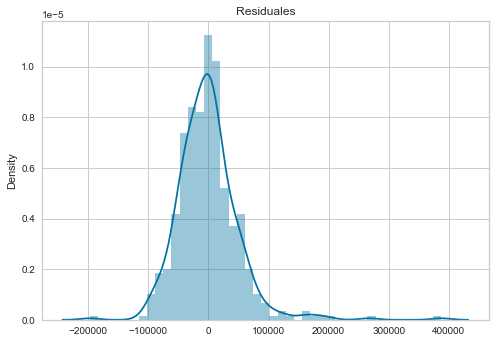

In [35]:
# %%
sb.distplot(residuales);
plt.title("Residuales")

{'whiskers': [<matplotlib.lines.Line2D at 0x20b3aa29940>,
 'caps': [<matplotlib.lines.Line2D at 0x20b3aa350a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b3aa295b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20b3aa357c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b3aa35b50>],
 'means': []}

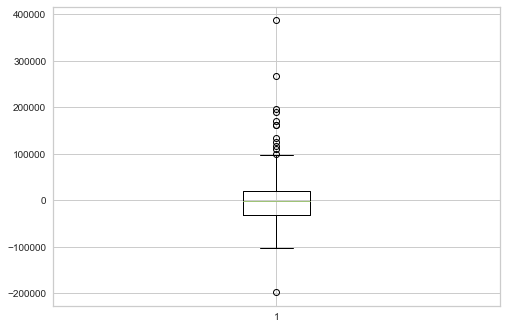

In [36]:
# %%
plt.boxplot(residuales)

In [37]:
# %%
normaltest(residuales)

NormaltestResult(statistic=array([202.53939164]), pvalue=array([1.0450328e-44]))

0.6298632324678691

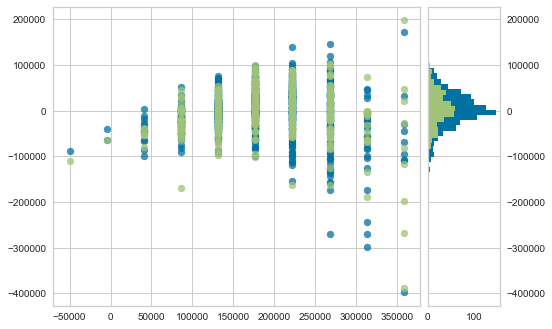

In [38]:
# %%
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(p_width,p_length)
visualizer.score(p_width_t,p_length_t)